In [2]:
import pandas as pd

df = pd.read_csv('ias-profile.csv')
print(df.columns)

df = df[df['Allotment_Year'] >= 1990]
df = df[df['Source_of_Recruitment'] == 'Direct Recruitment']

Index(['ID', 'Name', 'Cadre', 'Allotment_Year', 'Date_of_Birth',
       'Date_of_Joining', 'Source_of_Recruitment', 'Gender',
       'Place_of_Domicile', 'Mother_Tongue', 'Languages_Known', 'Retired',
       'Retirement_Reason', 'Last_Education_Qualification',
       'Last_Education_Subject', 'Last_Education_Division', 'Last_Designation',
       'Last_Level', 'Last_Office', 'Last_Field_of_Experience',
       'Last_Category_of_Experience', 'Last_Start_Date', 'Last_End_Date',
       'Source', 'Gender_Source'],
      dtype='object')


In [3]:
df['Gender'].value_counts()
counts = df.groupby(['Allotment_Year', 'Gender']).size().unstack()

# Calculate the percentage of male officers for each allotment year
male_perc = counts['Male'] / counts.sum(axis=1) * 100

# Display the result
print(male_perc, counts.sum(axis=1))

Allotment_Year
1990    88.679245
1991    84.761905
1992    83.950617
1993    85.000000
1994    74.683544
1995    83.544304
1996    85.000000
1997    78.947368
1998    90.909091
1999    81.481481
2000    83.928571
2001    71.929825
2002    77.966102
2003    71.830986
2004    77.647059
2005    83.516484
2006    75.581395
2007    80.434783
2008    70.535714
2009    73.109244
2010    68.702290
2011    84.563758
2012    80.473373
2013    69.662921
2014    69.273743
2015    69.444444
2016    79.096045
2017    72.527473
2018    74.301676
2019    67.777778
2020    70.949721
dtype: float64 Allotment_Year
1990    106
1991    105
1992     81
1993     80
1994     79
1995     79
1996     80
1997     76
1998     55
1999     54
2000     56
2001     57
2002     59
2003     71
2004     85
2005     91
2006     86
2007     92
2008    112
2009    119
2010    131
2011    149
2012    169
2013    178
2014    179
2015    180
2016    177
2017    182
2018    179
2019    180
2020    179
dtype: int64


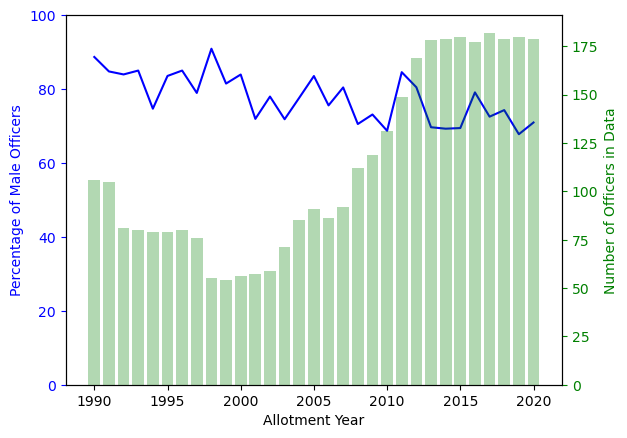

In [4]:
import matplotlib.pyplot as plt

# Plot the percentage of male officers on a line graph
fig, ax1 = plt.subplots()
ax1.plot(male_perc.index, male_perc.values, 'b-')
ax1.set_xlabel('Allotment Year')
ax1.set_ylabel('Percentage of Male Officers', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim([0, 100])

# Add the number of officers as labels on the graph
ax2 = ax1.twinx()
ax2.bar(counts.index, counts.sum(axis=1), alpha=0.3, color='g')
ax2.set_ylabel('Number of Officers in Data', color='g')
ax2.tick_params('y', colors='g')

# Display the graph
plt.show()

In [5]:
# Calculate age based on date of birth and allotment year
df2 = df[df['Date_of_Birth'] != 'N.A.']
df2['Date_of_Birth'] = df2['Date_of_Birth'].astype(str).str[:4].astype(int)
df2['Date_of_Birth'].value_counts()
df2['age_at_joining'] = ((df2['Allotment_Year'].astype(int) - df2['Date_of_Birth'])).astype(int)

/var/folders/py/x5rcv75d6vvgjtlshbjsxv200000gn/T/ipykernel_10131/4239599508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date_of_Birth'] = df2['Date_of_Birth'].astype(str).str[:4].astype(int)
/var/folders/py/x5rcv75d6vvgjtlshbjsxv200000gn/T/ipykernel_10131/4239599508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age_at_joining'] = ((df2['Allotment_Year'].astype(int) - df2['Date_of_Birth'])).astype(int)


In [6]:
df2['age_at_joining'].value_counts()

age_at_joining
26    566
27    512
25    511
28    423
24    363
29    325
30    238
23    179
31    123
32    108
33     60
22     43
34     20
35     14
36     13
37      3
44      1
38      1
41      1
Name: count, dtype: int64

In [7]:
avg_age_by_year = df2.groupby(['Allotment_Year'])['age_at_joining'].mean()
avg_age_by_year

Allotment_Year
1990    25.216981
1991    25.638095
1992    25.246914
1993    25.475000
1994    25.632911
1995    25.886076
1996    25.500000
1997    26.421053
1998    25.981818
1999    26.074074
2000    25.750000
2001    27.052632
2002    26.881356
2003    26.971831
2004    27.094118
2005    27.714286
2006    27.767442
2007    28.195652
2008    27.660714
2009    28.126050
2010    27.839695
2011    27.342282
2012    27.662722
2013    27.702247
2014    27.268156
2015    27.322222
2016    27.491429
2017    27.126374
2018    27.094972
2019    27.022222
2020    27.329609
Name: age_at_joining, dtype: float64

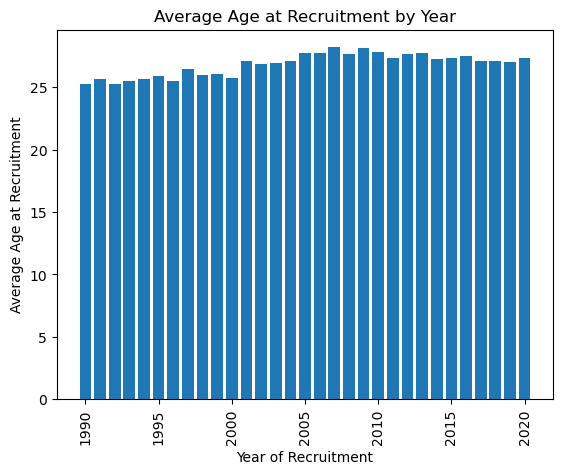

In [8]:
# Create a bar chart of the average age at recruitment by year
plt.bar(avg_age_by_year.index, avg_age_by_year)
plt.title('Average Age at Recruitment by Year')
plt.xlabel('Year of Recruitment')
plt.ylabel('Average Age at Recruitment')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [9]:
df3 = df[df['Allotment_Year'] <= 2005]
df4 = df[df['Allotment_Year'] > 2005]

In [10]:
df3['Place_of_Domicile'].value_counts()
df4['Place_of_Domicile'].value_counts()

Place_of_Domicile
Uttar Pradesh        345
Rajasthan            236
Tamil Nadu           214
Maharashtra          184
Bihar                175
Delhi                140
Haryana              133
Andhra Pradesh       117
Kerala               105
Karnataka            102
Punjab                89
Madhya Pradesh        71
Jharkhand             70
Telangana             36
Odisha                36
West Bengal           34
Jammu & Kashmir       32
Uttarakhand           32
Chandigarh            21
Himachal Pradesh      20
Chhattisgarh          19
Manipur               17
Gujarat               17
Assam                 13
Arunachal Pradesh      6
Others                 4
Pondicherry            4
Meghalaya              4
-                      3
Nagaland               3
Mizoram                3
Sikkim                 3
Tripura                3
Ladakh                 1
Name: count, dtype: int64

In [11]:
state_counts3 = df3['Place_of_Domicile'].value_counts(normalize=True)
state_counts4 = df4['Place_of_Domicile'].value_counts(normalize=True)

state_counts3 = pd.DataFrame({'state': state_counts3.index, 'frequency':state_counts3.values})
state_counts4 = pd.DataFrame({'state': state_counts4.index, 'frequency':state_counts4.values})

In [12]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt 

shp_gdf = gpd.read_file('india_map.shp')
shp_gdf.head()

state_counts3 = state_counts3.replace('Jammu & Kashmir', 'Jammu and Kashmir')
state_counts4 = state_counts4.replace('Jammu & Kashmir', 'Jammu and Kashmir')

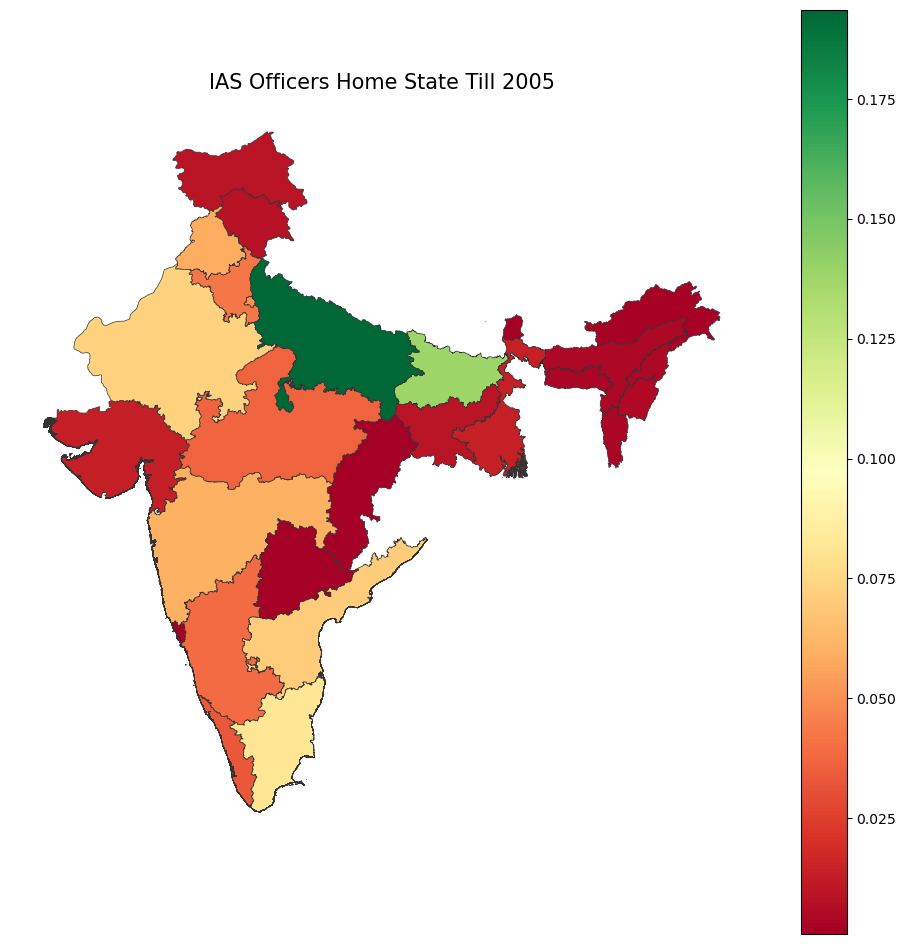

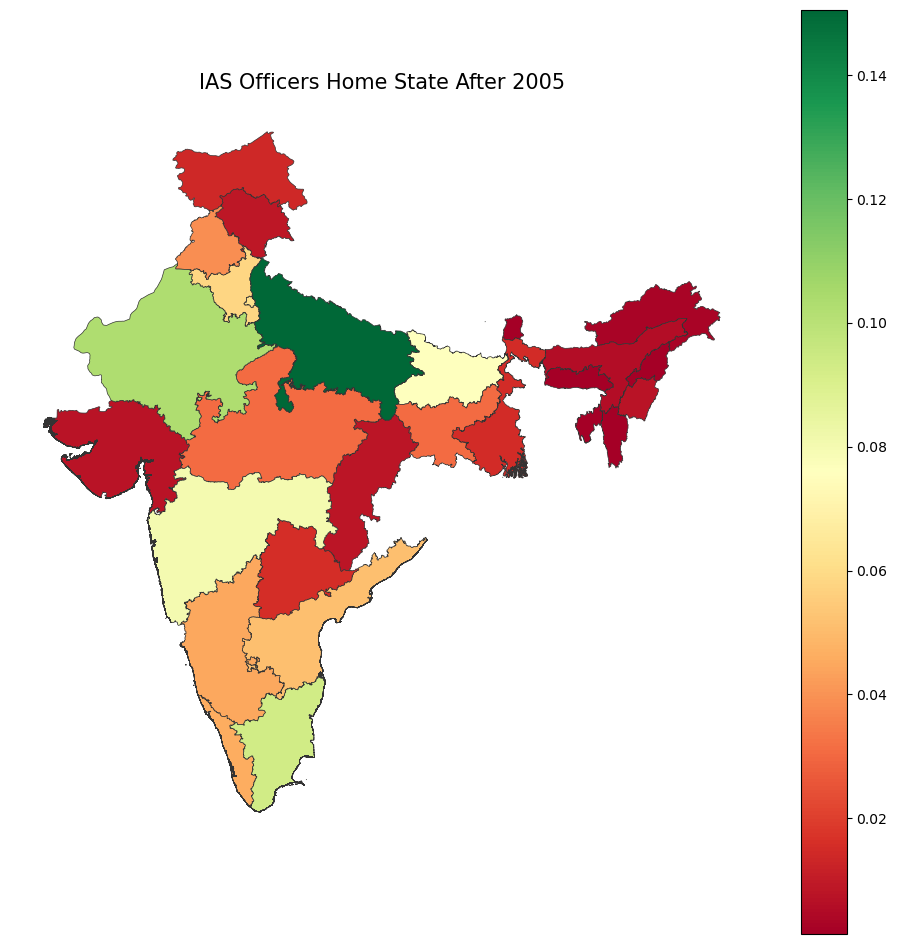

In [13]:
merged3 = shp_gdf.set_index('NAME_1').join(state_counts3.set_index('state'))
merged4 = shp_gdf.set_index('NAME_1').join(state_counts4.set_index('state'))

fig3, ax3 = plt.subplots(1, figsize=(12, 12))
ax3.axis('off')
ax3.set_title('IAS Officers Home State Till 2005',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig3 = merged3.plot(column='frequency', cmap='RdYlGn', linewidth=0.5, ax=ax3, edgecolor='0.2',legend=True)


fig4, ax4 = plt.subplots(1, figsize=(12, 12))
ax4.axis('off')
ax4.set_title('IAS Officers Home State After 2005',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig4 = merged4.plot(column='frequency', cmap='RdYlGn', linewidth=0.5, ax=ax4, edgecolor='0.2',legend=True)




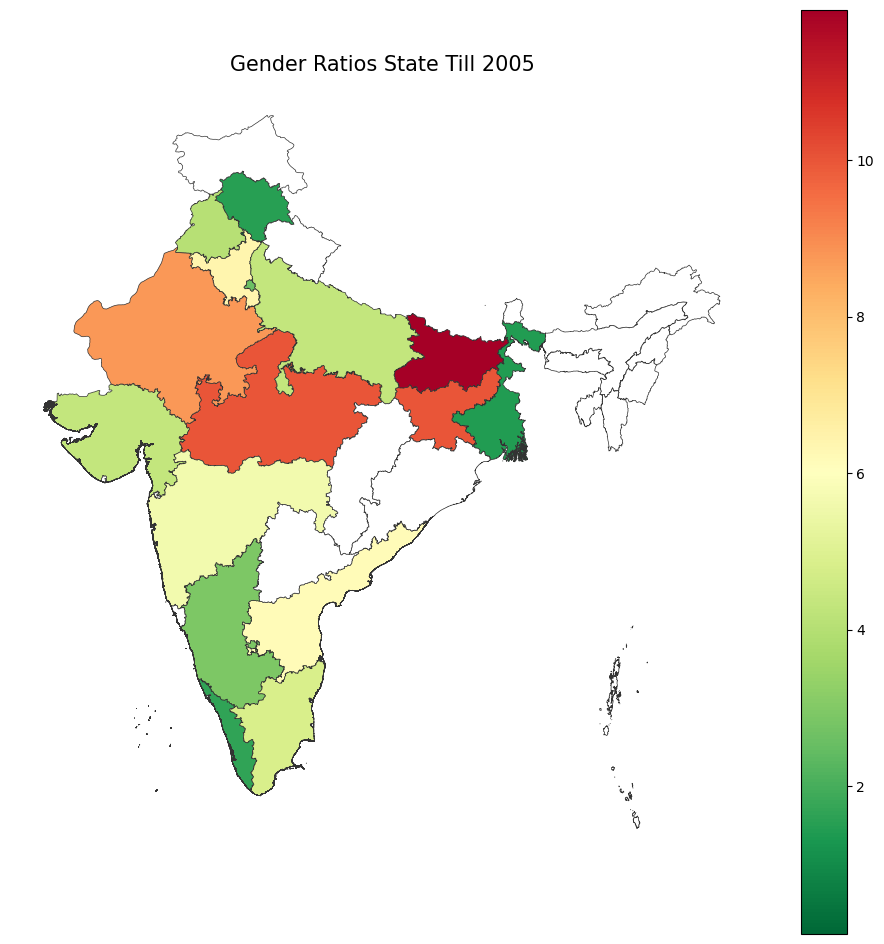

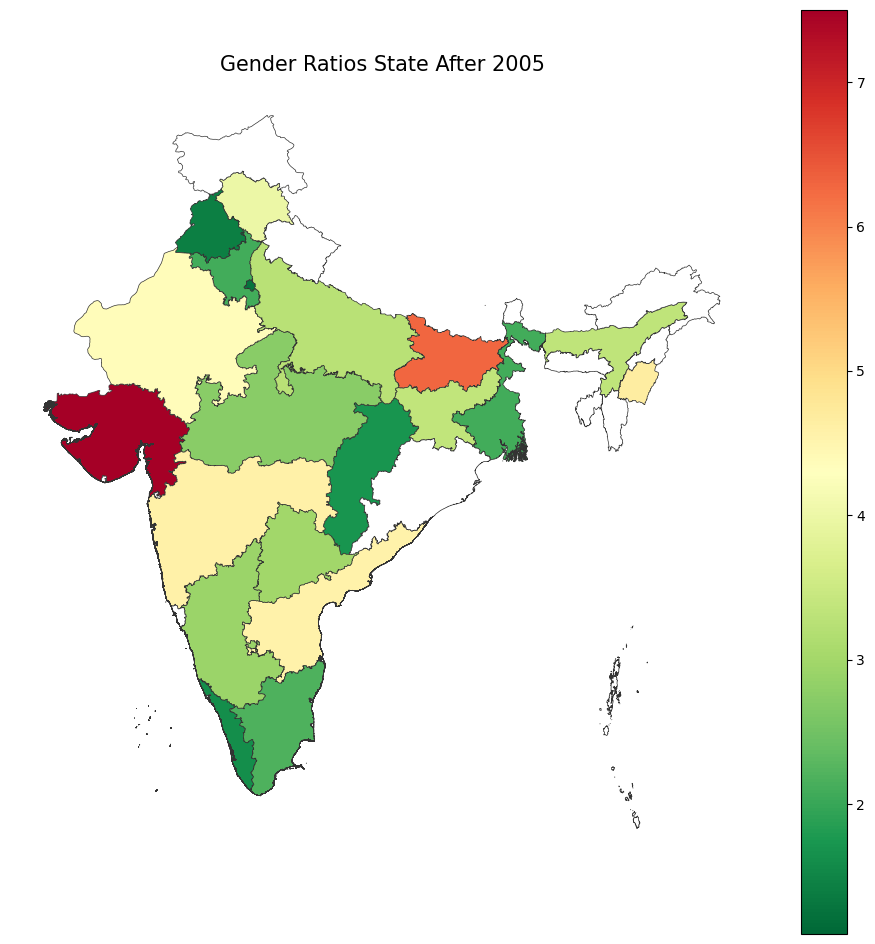

In [14]:
grouped3 = df3.groupby('Place_of_Domicile')
gender_counts3 = grouped3['Gender'].value_counts()
gender_ratios3 = gender_counts3.unstack().fillna(0)
gender_ratios3['Male/Female Ratio'] = (gender_ratios3['Male']) / (gender_ratios3['Female'])
gender_ratios3 = gender_ratios3[(gender_ratios3['Male'] + gender_ratios3['Female']) >= 10]

grouped4 = df4.groupby('Place_of_Domicile')
gender_counts4 = grouped4['Gender'].value_counts()
gender_ratios4 = gender_counts4.unstack().fillna(0)
gender_ratios4['Male/Female Ratio'] = (gender_ratios4['Male']) / (gender_ratios4['Female'])
gender_ratios4 = gender_ratios4[(gender_ratios4['Male'] + gender_ratios4['Female']) >= 10]

gender_ratios3 = gender_ratios3.reset_index()
gender_ratios4 = gender_ratios4.reset_index()

merged5 = shp_gdf.set_index('NAME_1').join(gender_ratios3.set_index('Place_of_Domicile'))
merged6 = shp_gdf.set_index('NAME_1').join(gender_ratios4.set_index('Place_of_Domicile'))

# merged5
# merged6
fig5, ax5 = plt.subplots(1, figsize=(12, 12))
ax5.axis('off')
ax5.set_title('Gender Ratios State Till 2005', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig5 = merged5.plot(column='Male/Female Ratio', cmap='RdYlGn_r', missing_kwds={'color': 'white'}, linewidth=0.5, ax=ax5, edgecolor='0.2',legend=True)


fig6, ax6 = plt.subplots(1, figsize=(12, 12))
ax6.axis('off')
ax6.set_title('Gender Ratios State After 2005',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig6 = merged6.plot(column='Male/Female Ratio', cmap='RdYlGn_r', missing_kwds={'color': 'white'}, linewidth=0.5, ax=ax6, edgecolor='0.2',legend=True)
